In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import force_module as force
from force_module import HP
import FF_module as FF


In [107]:
def get_inp_target_1(dt, voltage, amp, freq, T=1500, noise_scale=0.2):
    """For epoch 0: before BC. should show baseline actiivty."""
    inp = np.zeros((1, int(T / dt), 1))

    simtime = np.arange(0, T, dt)

    # tail activity: baseline.
    baseline = 0
    tail_activity = (force.get_ft(simtime, amp, freq) + baseline +
                     np.random.randn(simtime.shape[0]) * noise_scale)

    tail_activity = np.expand_dims(tail_activity, axis=(0, 2))

    hint = np.zeros(tail_activity.shape)

    return inp, tail_activity, hint


def get_inp_target_2(dt, voltage, amp, freq, T=1500, noise_scale=0.2):
    """For epoch 1: should increase and the ndecrease below baseline activity."""
    shock = np.zeros([int(1 / dt)])
    shock[0] = voltage
    shock[1] = voltage

    inp_shock = np.repeat(shock, int((T / dt) / shock.shape[0]))
    inp_shock = np.expand_dims(inp_shock, axis=(0, 2))

    simtime = np.arange(0, T, dt)

    # tail activity: increase for first 250 sec, then decrease. Should decrease
    # below baseline. Since the original data cannot be acquired,
    trend = np.append(np.arange(0, 2, 0.002),
                      np.arange(2, -3, -0.001))
    tail_activity = (force.get_ft(simtime, amp, freq) + trend +
                     np.random.randn(simtime.shape[0]) * noise_scale)
    tail_activity = np.expand_dims(tail_activity, axis=(0, 2))

    hint = np.zeros(tail_activity.shape)

    return inp_shock, tail_activity, hint

def get_inp_target_3(dt, voltage, amp, freq, T=1500, noise_scale=0.2):
    """For epoch 2: should increase and the ndecrease below baseline activity."""
    shock = np.zeros([int(1 / dt)])
    shock[0] = voltage
    shock[1] = voltage

    inp_shock = np.repeat(shock, int((T / dt) / shock.shape[0]))
    inp_shock = np.expand_dims(inp_shock, axis=(0, 2))

    simtime = np.arange(0, T, dt)

    # tail activity: increase for first 250 sec, then decrease. Should decrease
    # below baseline. Since the original data cannot be acquired,
    pc_state = -3
    tail_activity = (force.get_ft(simtime, amp, freq) + pc_state +
                     np.random.randn(simtime.shape[0]) * noise_scale)
    tail_activity = np.expand_dims(tail_activity, axis=(0, 2))

    hint = np.zeros(tail_activity.shape)

    return inp_shock, tail_activity, hint



{'network_size': 1000, 'dt': 0.25, 'tau': 2.5, 'noise_std': 0, 'g': 1.3, 'p': 1, 'inp_scale': 1, 'out_scale': 1, 'bias_scale': 0, 'init_act_scale': 1, 'num_epochs': 1, 'ff_steps_per_update': 1, 'ff_alpha': 1, 'ff_init_trials': 3, 'test_init_trials': 1}
Initializing...
Training network...
epoch 1 of 1,  1 examples: 
.mean epoch error:  1638.5306982231812

Done training!


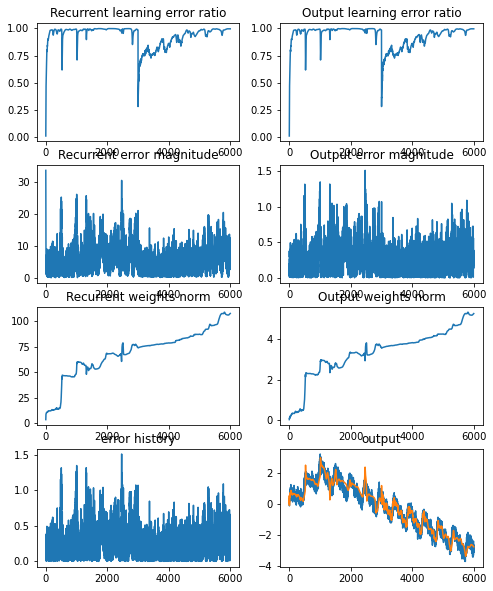

In [108]:
import importlib
importlib.reload(FF)
FF_hp = FF.create_parameters(dt=0.25, network_size=1000)
FF_hp['num_epochs'] = 1
FF_hp['ff_steps_per_update'] = 1
FF_hp['ff_alpha'] = 1
FF_hp['tau'] = 2.5
FF_hp['g'] = 1.3
print(FF_hp)

FF_rnn = FF.RNN(FF_hp, 1, 1)
output = FF_rnn.train(get_inp_target_2, monitor_training=1, voltage=5, amp=HP.amp, freq=HP.freq)

In [114]:
inp, targ, hint = get_inp_target_2(0.25, 5, HP.amp, HP.freq, T=1500)

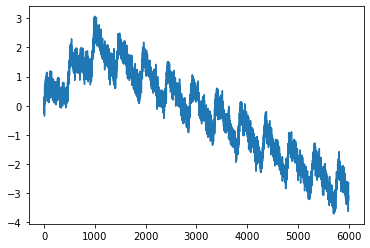

In [115]:
plt.plot(targ[0])

In [121]:
z, x = FF_rnn.run(np.ones((6000, 1)), record_flag=1)

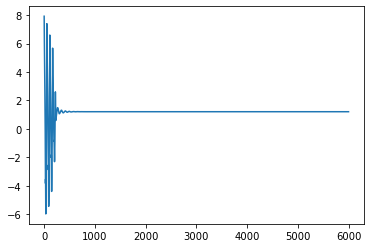

In [122]:
plt.plot(z)

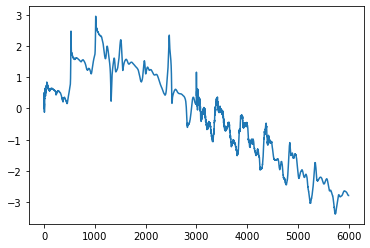

In [113]:
plt.plot(np.squeeze(np.array(output)))